In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [2]:
# Import data into Pandas as a data frame
df = pd.read_csv('./WBCD.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Transform DIAGNOSIS column to a numeric variable
df["diagnosis2"] = (df.diagnosis == "M").astype(int)
# drop the diagnosis variable expressed as 'M or 'B'
df = df.drop("diagnosis", axis="columns")
# Also, drop the ID variable as it should not be used for prediction
df = df.drop("id",axis="columns")
df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
predictor_cols = df.loc[:, df.columns != "diagnosis2"]
target_col = df["diagnosis2"]
predictor_cols[:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn import linear_model
lin_model = linear_model.LogisticRegression(max_iter = 1000)
# Fit the Logistic regression model now
lin_model.fit(predictor_cols, target_col)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
from sklearn import metrics

print ("Accuracy = %.3f" % (metrics.accuracy_score(lin_model.predict(predictor_cols), df.diagnosis2)))

Accuracy = 0.960


In [7]:
print(lin_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [8]:
# col_list = list(df.columns.values.tolist())
print("Number of columns in data frame = ", len(df.columns))
count = 0
for col in df.columns:
    if(col == "diagnosis2"):
        break
    print(col,"  ", lin_model.coef_[0,count],"\n")
    count = count + 1
    
print("FINALLY printing the Intercept for Logistic Regression = ", lin_model.intercept_)

Number of columns in data frame =  31
radius_mean    -2.07959660310137 

texture_mean    -0.12348297987020002 

perimeter_mean    0.04953496499749821 

area_mean    0.0038964987023728543 

smoothness_mean    0.15136336753446003 

compactness_mean    0.39532173325101866 

concavity_mean    0.6355543111621357 

concave points_mean    0.33533271343264615 

symmetry_mean    0.2223208250519077 

fractal_dimension_mean    0.025991525894494775 

radius_se    0.027765776401673027 

texture_se    -1.2283642807872528 

perimeter_se    0.0077203847277657785 

area_se    0.09365472244253778 

smoothness_se    0.01658307390435634 

compactness_se    -0.00642057122448544 

concavity_se    0.04680825923089448 

concave points_se    0.03957729204610516 

symmetry_se    0.041585101443295906 

fractal_dimension_se    -0.006157634611505283 

radius_worst    -1.2274839786536351 

texture_worst    0.3455570417768119 

perimeter_worst    0.12742413631129743 

area_worst    0.02374507610046389 

smoothness_w

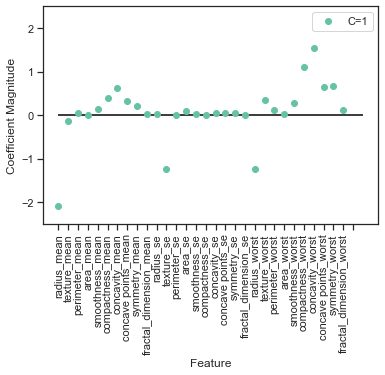

In [9]:
plt.plot(lin_model.coef_.T,'o',label = "C=1")
plt.xticks(range(df.shape[1]),df.columns.drop("diagnosis2"), rotation = 90)
plt.hlines(0,0,df.shape[1])
plt.ylim(-2.5,2.5)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.legend()

In [10]:
X_new1=[[20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902]]
def Predict_for_new_patient(X_new):
    pred_val = lin_model.predict(X_new)
    print("Prediction for new value = ", pred_val)
    if(pred_val == 1):
        pred_valstr = "Malignant"
    elif(pred_val == 0):
        pred_valstr = "Benign"
        
    return(pred_valstr)
    
print("Predicted value for New Patient = " , Predict_for_new_patient(X_new1))

Prediction for new value =  [1]
Predicted value for New Patient =  Malignant


In [11]:
X_new2 = [[10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.06481,0.355,1.534,2.302,23.13,0.007595,0.02219,0.0288,0.008614,0.0271,0.003451,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552]]
print("Prediction for new value = ", Predict_for_new_patient(X_new2))

Prediction for new value =  [0]
Prediction for new value =  Benign


In [12]:
print("Predicted probability of class 1 (diagnosis2 = 1) = ", lin_model.predict_proba(X_new1)[:,1])

Predicted probability of class 1 (diagnosis2 = 1) =  [0.99999998]


In [13]:
print("Predicted probability of class 0 (or diagnosis2 = 0) = ", (1-lin_model.predict_proba(X_new2)[:,1]))

Predicted probability of class 0 (or diagnosis2 = 0) =  [0.99762991]


In [14]:
# Finally print the ODDS ratios for each of the independent variables
# The ODDS ratio os the increase in likelihood for a ONE unit increase in the independent variable
# The odds ratio is simply the exponent of the fitted coefficient
# col_list = list(df.columns.values.tolist())
print("Number of columns in data frame = ", len(df.columns))
count = 0
for col in df.columns:
    # Do nothing if you have reached the last column since it contains the diagnosis (the Y variable)
    if(col == "diagnosis2"):
        break
    print("ODDS Ratio for variable ", col,"=  ", np.exp(lin_model.coef_[0,count]),"\n")
    count = count + 1
    

Number of columns in data frame =  31
ODDS Ratio for variable  radius_mean =   0.12498061882498333 

ODDS Ratio for variable  texture_mean =   0.883836684131148 

ODDS Ratio for variable  perimeter_mean =   1.0507823321741299 

ODDS Ratio for variable  area_mean =   1.0039040999229505 

ODDS Ratio for variable  smoothness_mean =   1.1634193300980462 

ODDS Ratio for variable  compactness_mean =   1.4848618435066592 

ODDS Ratio for variable  concavity_mean =   1.8880684288525458 

ODDS Ratio for variable  concave points_mean =   1.398405576150013 

ODDS Ratio for variable  symmetry_mean =   1.2489720151051926 

ODDS Ratio for variable  fractal_dimension_mean =   1.0263322511888113 

ODDS Ratio for variable  radius_se =   1.0281548380907641 

ODDS Ratio for variable  texture_se =   0.29277107750490455 

ODDS Ratio for variable  perimeter_se =   1.007750263740935 

ODDS Ratio for variable  area_se =   1.0981805033671155 

ODDS Ratio for variable  smoothness_se =   1.0167213362888645 

OD